# Statistics Test Project 1

In this project we will use basic Python and statistical knowledge to analyze some movies ratings (2016-2017) to determine if an apparent problem in an online movie ratings aggregator called "Fandango" was already fixed after a data journalist (Walt Hickey) noticed that the website was rounding up the movie's ratings. The incident happened in october of 2016 and the website said it was not intentional and was caused by a bug and they would fix it.

So lets make some test using the data and see what we find.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
from numpy import arange

%matplotlib inline  

#pd.options.display.max_columns = 100

In [2]:
old_data = pd.read_csv("fandango_score_comparison.csv")
new_data = pd.read_csv("movie_ratings_16_17.csv")

We will use 2 datasets. 

The "old_data" is the original data used by Walt Hickey when he discovered the issues with the rating system in 2015. 

The "new_data" is the data related to movies from 2016 and 2017 from the same website (Fandango), and we will use it to compare the old and new data to see if the issue seems to be resolved.

In [3]:
print(old_data.describe())
print(old_data.info())

       RottenTomatoes  RottenTomatoes_User  Metacritic  Metacritic_User  \
count      146.000000           146.000000  146.000000       146.000000   
mean        60.849315            63.876712   58.808219         6.519178   
std         30.168799            20.024430   19.517389         1.510712   
min          5.000000            20.000000   13.000000         2.400000   
25%         31.250000            50.000000   43.500000         5.700000   
50%         63.500000            66.500000   59.000000         6.850000   
75%         89.000000            81.000000   75.000000         7.500000   
max        100.000000            94.000000   94.000000         9.600000   

             IMDB  Fandango_Stars  Fandango_Ratingvalue     RT_norm  \
count  146.000000      146.000000            146.000000  146.000000   
mean     6.736986        4.089041              3.845205    3.042466   
std      0.958736        0.540386              0.502831    1.508440   
min      4.000000        3.000000       

In [4]:
print(new_data.describe())
print(new_data.info())

              year   metascore        imdb      tmeter    audience  \
count   214.000000  214.000000  214.000000  214.000000  214.000000   
mean   2016.107477   53.266355    6.440654   53.621495   58.626168   
std       0.310444   17.843585    1.030056   30.242396   21.100040   
min    2016.000000   11.000000    3.500000    0.000000   11.000000   
25%    2016.000000   39.000000    5.825000   27.000000   43.250000   
50%    2016.000000   53.500000    6.500000   56.500000   60.500000   
75%    2016.000000   66.000000    7.200000   83.000000   76.750000   
max    2017.000000   99.000000    8.500000   99.000000   93.000000   

         fandango  n_metascore      n_imdb    n_tmeter  n_audience  \
count  214.000000   214.000000  214.000000  214.000000  214.000000   
mean     3.894860     2.663318    3.220327    2.681075    2.931308   
std      0.516781     0.892179    0.515028    1.512120    1.055002   
min      2.500000     0.550000    1.750000    0.000000    0.550000   
25%      3.500000  

In [5]:
old_data.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [6]:
new_data.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [7]:
old_dataset = old_data[["FILM", "Fandango_Stars", "Fandango_Ratingvalue", 
                        "Fandango_votes", "Fandango_Difference"]].copy()
new_dataset = new_data[["movie", "year", "fandango"]].copy()

After checking the content from both the old and new data, we selected some of the most relevants fields in the dataset and saved them as new datasets to work with.

In [8]:
old_dataset.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [9]:
new_dataset.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


After reviewing the way the data was collected for both the old and new data, we determined is better to slighly change our goal for the analysis since the data do not seems to be representative for the population we need.

Our new goal will be to determine if there was any change between the ratings in movies from 2015 and 2016.

In [10]:
movies_2015 = old_dataset[old_dataset["FILM"].str.contains('(2015)')]

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



With this we now have the movies from 2015.

In [11]:
movies_2016 = new_dataset[new_dataset["year"]==2016]

With this we now have the movies from 2016.

We will select as a filter that all the movies for the analysis must have more than 30 ratings on the Fandango website. This is the same filter used by Walt Hickey the first time.

Since the new dataset do not have a count for the ammount of reviews, we will try getting a sample and then checking on the Fandango website if it is popular. If that is the case we could considet the sample representative enough.

In [12]:
movies_2015_popular = movies_2015[movies_2015["Fandango_votes"] > 30]

The documentation provided by Walt Hickey said that he already selected the movies with over 30 ratings.

Just to make sure we now have the "movies_2015_popular" dataset. If we try to get the shape of the dataset, we will notice it have the same shape as the "movies_2015", what means that just confirmed that all the movies in the dataset had over 30 ratings.

In [13]:
movies_2016_sample = movies_2016.sample(10, random_state=1)

In [14]:
movies_2016_sample

,movie,year,fandango
36,Collide,2016,3.5
75,Ice Age: Collision Course,2016,4.0
125,Now You See Me 2,2016,4.0
171,The Disappointments Room,2016,2.5
92,Kubo and the Two Strings,2016,4.5
134,Pride and Prejudice and Zombies,2016,4.0
40,Deadpool,2016,4.5
115,Money Monster,2016,4.0
204,War Dogs,2016,4.0
111,Miracles from Heaven,2016,4.5


After checking the list of movies from "movies_2016_popular" directly from the Fandango website, we can confirm that around 80%-90% of the movies in the sample are popular enough to be used in the analysis as representative of popular movies population.

In [15]:
movies_2016_popular = new_dataset.copy()

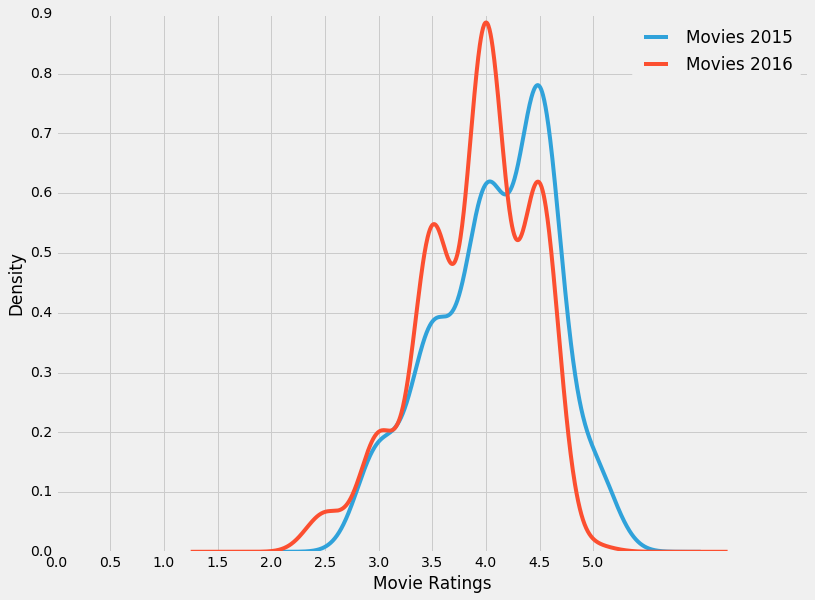

In [16]:
plt.style.use("fivethirtyeight")
movies_2015_popular["Fandango_Stars"].plot.kde(label="Movies 2015", figsize=(12,9))
movies_2016_popular["fandango"].plot.kde(label="Movies 2016", figsize=(12,9))
plt.xlabel("Movie Ratings")
plt.ylabel("Density")
plt.xticks(arange(0, 5.5, 0.5))
plt.legend()
plt.show()

Here we can see the Kernel Density Estimate for the ratings of the movies from 2015 and 2016. They seems to have an aproximate normal distribution and with similar high values. At simple view, the movies from 2015 seems to have better ratings than the ones from 2016. The higher ammount of rating values of 2015 movies seems to be around 4.5, while for 2016 movies seems to be around 4.0.

Because some movies from the group of 2016 seems to have some really low rating movies, we can see a variation in the growth of the line on ratings around 2.5.

The line for 2015 movies seems to have a constant growth, and then decrease in the same way after reaching its maximum.

Before doing any other analysis we can say that the movies from 2015 had better rating in general, and the movies from 2016 seems to have some lower rating movies.

In [17]:
print("Number of movies for old_dataset: ", old_dataset.shape[0])
frequency_old = movies_2015_popular["Fandango_Stars"].value_counts()
frequency_old

Number of movies for old_dataset:  146


4.5    49
4.0    37
3.5    23
3.0    11
5.0     9
Name: Fandango_Stars, dtype: int64

In [18]:
print("Number of movies for new_dataset: ", new_dataset.shape[0])
frequency_new = movies_2016_popular["fandango"].value_counts()
frequency_new

Number of movies for new_dataset:  214


4.0    82
4.5    57
3.5    50
3.0    18
2.5     6
5.0     1
Name: fandango, dtype: int64

We can see here the frequency table for both datasets. Also we notice that the old_dataset (2015 movies) have fewer movies than the new_dataset(2016 movies).

In [19]:
frequency_2015_percentage = movies_2015_popular["Fandango_Stars"].value_counts(normalize=True).sort_index(ascending=False) * 100

print(frequency_2015_percentage.map("{:.2f}%".format))

5.0     6.98%
4.5    37.98%
4.0    28.68%
3.5    17.83%
3.0     8.53%
Name: Fandango_Stars, dtype: object


In [20]:
frequency_2016_percentage = movies_2016_popular["fandango"].value_counts(normalize=True).sort_index(ascending=False) * 100

print(frequency_2016_percentage.map("{:.2f}%".format))

5.0     0.47%
4.5    26.64%
4.0    38.32%
3.5    23.36%
3.0     8.41%
2.5     2.80%
Name: fandango, dtype: object


To have a better idea of the distribution of the frequency table, we will normalize the values and multiply them by 100 so we can get the percentage.

Movies from 2015 seems to have a higher ammount of movies with rating 5 and 4.5, while the movies from 2016 show an aproximately normal distribution between 3.5 and 4.5.

In [21]:
print("Values for 2015 movies\n")
print("Mean:   ", movies_2015_popular["Fandango_Stars"].mean())
print("Median: ", movies_2015_popular["Fandango_Stars"].median())
print("Mode:   ", movies_2015_popular["Fandango_Stars"].mode()[0])
     

Values for 2015 movies

Mean:    4.0852713178294575
Median:  4.0
Mode:    4.5


In [22]:
print("Values for 2016 movies\n")
print("Mean:   ", movies_2016_popular["fandango"].mean())
print("Median: ", movies_2016_popular["fandango"].median())
print("Mode:   ", movies_2016_popular["fandango"].mode()[0])

Values for 2016 movies

Mean:    3.8948598130841123
Median:  4.0
Mode:    4.0


We can see that the median for both ratings in the dataset is 4.0 even when the range is from 1.0 to 5.0. This is because almost all the values in the rating go from 3.0 to 5.0, and the median of that is 4.0.

The mean for both datasets is pretty similar, but the movies from 2015 have a slightly higher mean.

The mode is also higher on movies from 2015. We can confirm this with the frequency table in percentage.

In [23]:
comparative = pd.DataFrame(index=["Mean", "Median", "Mode"])

comparative["2015"] = [movies_2015_popular["Fandango_Stars"].mean(),
                       movies_2015_popular["Fandango_Stars"].median(),
                       movies_2015_popular["Fandango_Stars"].mode()[0]]

comparative["2016"] = [movies_2016_popular["fandango"].mean(),
                       movies_2016_popular["fandango"].median(),
                       movies_2016_popular["fandango"].mode()[0]]

In [24]:
comparative

,2015,2016
Mean,4.085271,3.89486
Median,4.000000,4.00000
Mode,4.500000,4.00000


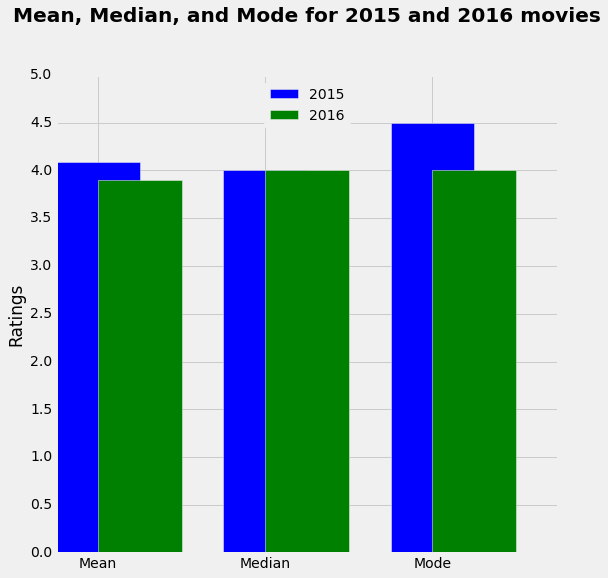

In [25]:
comparative["2015"].plot.bar(color="blue", label="2015", align="center", figsize=(8, 8))
comparative["2016"].plot.bar(color="green", label="2016", align="edge")
plt.title("Mean, Median, and Mode for 2015 and 2016 movies", y=1.1, weight="bold")
plt.xticks(rotation=360)
plt.yticks(arange(0, 5.5, 0.5))
plt.ylabel("Ratings")
plt.legend(loc="upper center", fontsize="medium")
plt.show()

As we can see in the bar plot, the comparison between the rating from movies of 2015 and 2016, shows that the movies from 2015 have better ratings, but this difference is minimal.

In conclusion there is a difference between the movies ratings from both years, and even when it it noticiable, it is minimal.